In [2]:
import sqlite3
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#Conexion a la base y extraccion de datos
connection = sqlite3.connect('../../chembl_29.db')
cursor = connection.cursor()
query = "SELECT ACT.ACTIVITY_ID, ASY.ASSAY_ID, ACT.MOLREGNO , ASY.CELL_ID, ACT.STANDARD_VALUE,ACT.STANDARD_UNITS, ACT.STANDARD_TYPE " \
    " FROM ACTIVITIES ACT INNER JOIN ASSAYS ASY ON ACT.ASSAY_ID = ASY.ASSAY_ID" \
    " WHERE ASY.CELL_ID IS NOT NULL"

In [3]:
cursor.execute(query)

In [4]:
#Creacion dataframe con informacion de la base de datos
activity_dictionary = cursor.fetchall()
activity_df = pd.DataFrame(activity_dictionary,columns=['activity_id','assay_id','compound_id','cell_id','std_value','std_units','std_type'])
activity_df

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5590420,20761520,1997725,1570918,489,11.0,nM,EC50
5590421,20770075,1997798,2484913,440,125.0,nM,IC50
5590422,20770076,1997799,2484913,649,390.0,nM,IC50
5590423,20770077,1997800,2484913,559,258.0,nM,IC50


In [5]:
#Seleccion de tipos de actividades
raw_act = activity_df[activity_df['std_type'].isin(['IC50','CC50','EC50','GI50'])]
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5590420,20761520,1997725,1570918,489,11.0,nM,EC50
5590421,20770075,1997798,2484913,440,125.0,nM,IC50
5590422,20770076,1997799,2484913,649,390.0,nM,IC50
5590423,20770077,1997800,2484913,559,258.0,nM,IC50


In [6]:
#Seleccion de unidades
raw_act = raw_act[raw_act['std_units'].isin(['nM', '10^4M', '/uM', "10'-11uM", "10'10uM", "10'8pM", "10'7pM", "10'6pM", "10'5pM", "10'-4nM", "10'6uM", "10'5uM", 'µM'])]
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5590420,20761520,1997725,1570918,489,11.0,nM,EC50
5590421,20770075,1997798,2484913,440,125.0,nM,IC50
5590422,20770076,1997799,2484913,649,390.0,nM,IC50
5590423,20770077,1997800,2484913,559,258.0,nM,IC50


In [7]:
#TRANSFORMACIONES A uM

# nM
raw_act.loc[ raw_act['std_units'] == 'nM',['std_value']] * 0.001
raw_act.loc[ raw_act['std_units'] == 'nM',['std_units']] = 'uM'

# 10^4M 
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_value']] * 10**4
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_value']] * 1000000
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_units']] = 'uM'

# /uM 
raw_act.loc[ raw_act['std_units'] == '/uM',['std_units']] = 'uM'


# 10'-11uM 
raw_act.loc[ raw_act['std_units'] == "10'-11uM",['std_value']] * 10**-11
raw_act.loc[ raw_act['std_units'] == "10'-11uM",['std_units']] = 'uM'

# 10'10uM
raw_act.loc[ raw_act['std_units'] == "10'10uM",['std_value']] * 10**10
raw_act.loc[ raw_act['std_units'] == "10'10uM",['std_units']] = 'uM'

# 10'8pM  
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_value']] * 10**8
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_units']] = 'uM'

# 10'7pM
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_value']] * 10**7
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_units']] = 'uM'

#[   "10'5uM", 'µM']

# 10'6pM 
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_value']] * 10**6
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_units']] = 'uM'

# 10'5pM    
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_value']] * 10**5
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_units']] = 'uM'

# 10'-4nM  
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_value']] * 10**-4
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_value']] * 0.001
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_units']] = 'uM'


# 10'6uM  
raw_act.loc[ raw_act['std_units'] == "10'6uM",['std_value']] * 10**6
raw_act.loc[ raw_act['std_units'] == "10'6uM",['std_units']] = 'uM'

# 10'5uM
raw_act.loc[ raw_act['std_units'] == "10'5uM",['std_value']] * 10**5
raw_act.loc[ raw_act['std_units'] == "10'5uM",['std_units']] = 'uM'

# µM 
raw_act.loc[ raw_act['std_units'] == "µM",['std_units']] = 'uM'

In [8]:
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,uM,CC50
1,162404,5,82983,163,90000.0,uM,CC50
2,164804,5,1633207,163,340000.0,uM,CC50
3,166046,5,1633675,163,2400.0,uM,CC50
4,166057,5,47675,163,7000000.0,uM,CC50
...,...,...,...,...,...,...,...
5590420,20761520,1997725,1570918,489,11.0,uM,EC50
5590421,20770075,1997798,2484913,440,125.0,uM,IC50
5590422,20770076,1997799,2484913,649,390.0,uM,IC50
5590423,20770077,1997800,2484913,559,258.0,uM,IC50


In [9]:
#Clasificacion de las actividades y no actividades
raw_act['active']= np.where(raw_act['std_value']<=10.0,1,-1)

C:\Users\Ramses\AppData\Local\Temp\ipykernel_2872\191682871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_act['active']= np.where(raw_act['std_value']<=10.0,1,-1)


In [10]:
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type,active
0,161152,5,556,163,600000.0,uM,CC50,-1
1,162404,5,82983,163,90000.0,uM,CC50,-1
2,164804,5,1633207,163,340000.0,uM,CC50,-1
3,166046,5,1633675,163,2400.0,uM,CC50,-1
4,166057,5,47675,163,7000000.0,uM,CC50,-1
...,...,...,...,...,...,...,...,...
5590420,20761520,1997725,1570918,489,11.0,uM,EC50,-1
5590421,20770075,1997798,2484913,440,125.0,uM,IC50,-1
5590422,20770076,1997799,2484913,649,390.0,uM,IC50,-1
5590423,20770077,1997800,2484913,559,258.0,uM,IC50,-1


In [11]:
raw_act.to_csv('raw_activity_29.csv',header=True,index=True)

In [12]:
act = pd.DataFrame(raw_act[['compound_id','cell_id','active']])
act

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590420,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1
5590423,2484913,559,-1


In [13]:
act.to_csv('activity_29.csv',header=True,index=True)
act

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590420,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1
5590423,2484913,559,-1


In [14]:

act.to_csv('summary29.csv',header=True,index=True)

In [15]:
act=pd.read_csv('summary29.csv',index_col=0).drop_duplicates(keep='first')


In [16]:
df_count = act.groupby(by=['compound_id','cell_id'])
df_count.size()

compound_id  cell_id
10           5566       1
23           330        1
             555        1
38           5566       1
39           5566       1
                       ..
2486468      506        1
             555        1
             619        1
2486469      478        1
             555        1
Length: 3309722, dtype: int64

In [5]:
df_count.size()[df_count.size()==1]

compound_id  cell_id
10           5566       1
23           330        1
             555        1
38           5566       1
39           5566       1
                       ..
2486468      506        1
             555        1
             619        1
2486469      478        1
             555        1
Length: 3293692, dtype: int64

In [17]:
#Obtencion de relaciones entre compuestos y actividad que solo contengan un tipo de actividad
index1 = pd.MultiIndex.from_arrays([act[col] for col in ['compound_id', 'cell_id']])
index2 = df_count.size()[df_count.size()==1].index

In [18]:
summ_act=act.loc[index1.isin(index2)]
summ_act


,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590417,2472890,632,1
5590419,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1


In [19]:
summ_act.to_csv('act_summary29.csv',header=True,index=True)

In [20]:
#Conteo de actividades y no actividades

size = summ_act.shape[0]
print (len(summ_act[summ_act['active'].isin([1])])/size)
print (len(summ_act[summ_act['active'].isin([-1])])/size)

0.0208616956290995
0.9791383043709005


SUMMARY

In [21]:
summary = pd.read_csv('act_summary29.csv',index_col=0)
summary

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590417,2472890,632,1
5590419,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1


In [22]:
#celulas que reportan tanto actividades como no actividades
cell_in_act = summary.groupby(by=['cell_id','active']).size().groupby(by=['cell_id']).size()[summary.groupby(by=['cell_id','active']).size().groupby(by=['cell_id']).size()==2].index
summary[summary['cell_id'].isin(cell_in_act)]

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590417,2472890,632,1
5590419,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1


In [23]:
b_summary_cell = summary[summary['cell_id'].isin(cell_in_act)]
b_summary_cell

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5590417,2472890,632,1
5590419,1570918,489,-1
5590421,2484913,440,-1
5590422,2484913,649,-1


In [24]:
b_summary_cell.groupby(by=['cell_id']).size().max()

81814

In [25]:
b_summary_cell.groupby(by=['cell_id']).size().min()

2

In [26]:
count_in_act_cell = b_summary_cell.groupby(by=['cell_id','active'])
count_in_act_cell

In [27]:
x_cell=count_in_act_cell['active'].size().values
x_cell

array([ 7, 13,  7, ...,  3,  6,  1], dtype=int64)

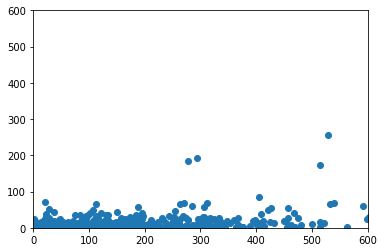

In [28]:
z_cell=x_cell[::2]
w_cell=x_cell[1::2]
plt.xlim(0,600)
plt.ylim(0,600)
plt.scatter(x=z_cell,y=w_cell)
plt.show()

INTERSECCIONES

In [36]:
intersections_matrix = np.zeros((952,952))

In [29]:
cell_rad_df = pd.read_csv('../datos/cell_c_radii_df.csv',index_col=0)
cell_rad_df

,cell_name,center,r2
0,CVCL_2260,"[0.13507872568263754, 0.0077602583237698875, -...",0.375213
1,CVCL_4806,"[0.1438778206697353, 0.04852056233703366, 0.00...",0.596738
2,CVCL_M605,"[0.16614108207377254, -0.03146658964662872, -0...",0.461877
3,CVCL_0464,"[0.14870812739929176, -0.03909651168168045, -0...",0.389280
4,CVCL_8987,"[0.14744802491027653, -0.006443613530958713, 0...",0.390232
...,...,...,...
947,CVCL_A637,"[0.1829866677575736, 0.12900832884666108, -0.0...",0.646020
948,CVCL_2992,"[0.20110780215403065, 0.19934965910049354, -0....",0.760930
949,CVCL_2995,"[0.17920858897094452, 0.07658716285881599, -0....",0.474875
950,CVCL_A446,"[0.18076409674022065, 0.01428818391511522, -0....",0.500937


In [38]:
def distancia(punto_a,punto_b):
    
    resta = list(map(lambda x,y: x-y ,punto_a,punto_b))
    vector = np.array(resta) 
    return mt.sqrt(sum(pow(element, 2) for element in vector))

In [ ]:
for cell_a in cell_rad_df.iterrows():
    cell_a_centroid =  eval(cell_a[1][1])
    cell_r1 = cell_a[1][2]
    print(cell_a[1][0])
    for cell_b in cell_rad_df.iterrows():
        if cell_a[0]!=cell_b[0]:
            cell_b_centroid =  eval(cell_b[1][1])
            cell_r2 = cell_b[1][2]
            dist_cell =distancia(cell_a_centroid,cell_b_centroid)
            radios =cell_r1 + cell_r2 
            intersec = (radios - dist_cell) / radios
            intersections_matrix[cell_a[0]][cell_b[0]] =intersec
        else:
            intersections_matrix[cell_a[0]][cell_b[0]] = 0

In [3]:
df_inter = pd.read_csv('intersecciones_div_rad.csv',index_col=0)
df_inter

,0,1,2,3,4,5,6,7,8,9,...,942,943,944,945,946,947,948,949,950,951
0,0.000000,0.622633,0.680323,0.573238,0.605027,0.647219,0.476542,0.540673,0.725521,0.694860,...,0.679157,0.606243,0.703313,0.709013,0.662246,0.611179,0.646068,0.458724,0.501885,0.612686
1,0.622633,0.000000,0.686786,0.623624,0.662028,0.685622,0.573397,0.594517,0.738885,0.718517,...,0.712606,0.663454,0.734318,0.740103,0.701452,0.660811,0.693528,0.541455,0.575737,0.672090
2,0.680323,0.686786,0.000000,0.734585,0.751432,0.804586,0.641205,0.746098,0.847227,0.800672,...,0.748312,0.682017,0.775222,0.776566,0.732743,0.687087,0.714912,0.562520,0.597221,0.717124
3,0.573238,0.623624,0.734585,0.000000,0.668115,0.706848,0.517472,0.603350,0.837212,0.726183,...,0.687896,0.622809,0.719502,0.721479,0.672385,0.623670,0.658378,0.481329,0.519176,0.625522
4,0.605027,0.662028,0.751432,0.668115,0.000000,0.883225,0.559432,0.670134,0.803410,0.759298,...,0.716251,0.658117,0.746114,0.751295,0.698051,0.650260,0.682992,0.501897,0.539655,0.675172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.611179,0.660811,0.687087,0.623670,0.650260,0.673821,0.589297,0.608352,0.743673,0.725971,...,0.894764,0.679563,0.908980,0.898402,0.847116,0.000000,0.861852,0.732408,0.727008,0.653100
948,0.646068,0.693528,0.714912,0.658378,0.682992,0.701777,0.638032,0.644301,0.767567,0.752007,...,0.866035,0.719262,0.889573,0.881599,0.817999,0.861852,0.000000,0.751129,0.687324,0.684481
949,0.458724,0.541455,0.562520,0.481329,0.501897,0.531238,0.423159,0.407056,0.634729,0.623862,...,0.769969,0.551141,0.776267,0.770896,0.761824,0.732408,0.751129,0.000000,0.576020,0.523159
950,0.501885,0.575737,0.597221,0.519176,0.539655,0.571933,0.460608,0.459712,0.659645,0.642386,...,0.790619,0.583985,0.777815,0.799448,0.814443,0.727008,0.687324,0.576020,0.000000,0.603742


In [41]:
#calculo mayor valor
maximo_val = df_inter.max() 
maximos =maximo_val.to_frame()
maximos.nlargest(1,0)

,0
137,0.989414


In [42]:
minimo_val = df_inter.min()
minimos =minimo_val.to_frame()
minimos.nsmallest(1,0)

,0
771,-1.763669


In [30]:
nombres= cell_rad_df['cell_name']
df_inter_cell = pd.concat([nombres, df_inter], axis=1)
df_inter_cell

,cell_name,0,1,2,3,4,5,6,7,8,...,942,943,944,945,946,947,948,949,950,951
0,CVCL_2260,0.000000,0.622633,0.680323,0.573238,0.605027,0.647219,0.476542,0.540673,0.725521,...,0.679157,0.606243,0.703313,0.709013,0.662246,0.611179,0.646068,0.458724,0.501885,0.612686
1,CVCL_4806,0.622633,0.000000,0.686786,0.623624,0.662028,0.685622,0.573397,0.594517,0.738885,...,0.712606,0.663454,0.734318,0.740103,0.701452,0.660811,0.693528,0.541455,0.575737,0.672090
2,CVCL_M605,0.680323,0.686786,0.000000,0.734585,0.751432,0.804586,0.641205,0.746098,0.847227,...,0.748312,0.682017,0.775222,0.776566,0.732743,0.687087,0.714912,0.562520,0.597221,0.717124
3,CVCL_0464,0.573238,0.623624,0.734585,0.000000,0.668115,0.706848,0.517472,0.603350,0.837212,...,0.687896,0.622809,0.719502,0.721479,0.672385,0.623670,0.658378,0.481329,0.519176,0.625522
4,CVCL_8987,0.605027,0.662028,0.751432,0.668115,0.000000,0.883225,0.559432,0.670134,0.803410,...,0.716251,0.658117,0.746114,0.751295,0.698051,0.650260,0.682992,0.501897,0.539655,0.675172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,CVCL_A637,0.611179,0.660811,0.687087,0.623670,0.650260,0.673821,0.589297,0.608352,0.743673,...,0.894764,0.679563,0.908980,0.898402,0.847116,0.000000,0.861852,0.732408,0.727008,0.653100
948,CVCL_2992,0.646068,0.693528,0.714912,0.658378,0.682992,0.701777,0.638032,0.644301,0.767567,...,0.866035,0.719262,0.889573,0.881599,0.817999,0.861852,0.000000,0.751129,0.687324,0.684481
949,CVCL_2995,0.458724,0.541455,0.562520,0.481329,0.501897,0.531238,0.423159,0.407056,0.634729,...,0.769969,0.551141,0.776267,0.770896,0.761824,0.732408,0.751129,0.000000,0.576020,0.523159
950,CVCL_A446,0.501885,0.575737,0.597221,0.519176,0.539655,0.571933,0.460608,0.459712,0.659645,...,0.790619,0.583985,0.777815,0.799448,0.814443,0.727008,0.687324,0.576020,0.000000,0.603742


In [4]:

df_mapeo_cell = pd.read_csv('../datos/cell_mapping.csv',index_col=0)
df_mapeo_cell

,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
cell_chembl_id,,,,,,,,,,
CHEMBL3307241,DC3F,1,DC3F,Cricetulus griseus,10029.0,Lung,CVCL_4704,NaN,NaN,NaN
CHEMBL3307242,P3HR-1,2,P3HR-1,Homo sapiens,9606.0,Lyphoma,CVCL_2676,LCL-2024,CLO_0008331,EFO_0002312
CHEMBL3307243,UCLA P-3,3,UCLA P-3,Homo sapiens,9606.0,Lung Adenocarcinoma,CVCL_N513,NaN,NaN,NaN
CHEMBL3307244,UMSCC22B,4,UMSCC22B,Homo sapiens,9606.0,Carcinoma,CVCL_7732,NaN,NaN,NaN
CHEMBL3307245,UMUC3,5,UMUC3,Homo sapiens,9606.0,Bladder Carcinoma,CVCL_1783,LCL-1721,CLO_0009487,EFO_0002387
...,...,...,...,...,...,...,...,...,...,...
CHEMBL3308306,KNS-81-FD,1696,KNS-81-FD,Homo sapiens,9606.0,NaN,CVCL_1336,LCL-1383,NaN,NaN
CHEMBL3308307,KURAMOCHI,1697,KURAMOCHI,Homo sapiens,9606.0,NaN,CVCL_1345,LCL-1701,NaN,NaN
CHEMBL3308308,LB771-HNC,1698,LB771-HNC,Homo sapiens,9606.0,NaN,CVCL_1369,LCL-1575,NaN,NaN


In [34]:
#top 10 con mapeo a cell_id

lista= []

#Se recorre el dataframe  horizontalmente
for label,content  in df_inter_cell.items():
    if label != 'cell_name':
        
        
        id = int(label)
        #Obtenemos el nombre de la linea celular actual con la ayuda del label recorrido
        name = df_inter_cell['cell_name'][id]

        #Otenemos el top 10
        top10 = df_inter_cell.nlargest(10,str(id))[['cell_name',str(id)]]

        #Guardamos en una lista los nombres de su top3 
        lista_top10 = top10['cell_name'].tolist()
        

        #Realizamos un cutoff para los valores mayyores a 0.8 

        lista_val_top10 = [val for val in top10[label].tolist() if val >= 0.8]

        lista_top10= lista_top10[:len(lista_val_top10)]

       
       #Si ninguna linea celular del top10 supero el cutoff no se la añade 

        if len(lista_top10) !=0:
            #----------------------------------------

            #Realizamos el mapeo 

            df_name_map = df_mapeo_cell[df_mapeo_cell['cellosaurus_id'].isin([name])]

            #si encuentra que existe la celula actual en el mapeo entonces se lo agrega
            if  not df_name_map.empty:
                
                cells =[]
                values=[]                
                
                for index,cell_name in enumerate(lista_top10):
                    
                    df_name_map_top10 = df_mapeo_cell[df_mapeo_cell['cellosaurus_id'].isin([cell_name])]
                    
                    if not df_name_map_top10.empty:
                        cells.append(df_name_map_top10['cell_id'][0])
                        values.append(lista_val_top10[index])
                        
                lista.append([df_name_map['cell_id'][0],cells,values])

In [35]:
#TOP10
listas_top10_mappings =pd.DataFrame(lista, columns=['cell_id','cell_top10','value_top10'])
listas_top10_mappings.to_csv('listas_top10_mapping.csv',index=0)

In [6]:
lista_mapp = pd.read_csv('listas_top10_mapping.csv')
lista_mapp

,cell_id,cell_top10,value_top10
0,433,"[1501, 1262, 1434, 622, 1478, 651, 1220, 646]","[0.8292894588490054, 0.8187765547886937, 0.817..."
1,163,"[698, 651, 646, 1501, 641, 786, 165, 633, 623,...","[0.8956966327324026, 0.8660311334932109, 0.860..."
2,377,"[408, 1506, 646, 633, 641, 786, 651, 405]","[0.9168315626718784, 0.8976510508479817, 0.849..."
3,620,[1611],[0.8098843080753313]
4,621,"[478, 610, 1019]","[0.8294095294386521, 0.8142067128807, 0.812799..."
...,...,...,...
224,1455,"[1213, 672, 633, 405, 797, 623, 641, 646, 1228]","[0.9305981530637462, 0.8930398688043325, 0.852..."
225,1533,"[1577, 346, 1511, 564, 1445, 1444, 623]","[0.8913037376746437, 0.8713244885021245, 0.865..."
226,690,"[616, 641, 668, 469, 565, 562, 789, 786, 633]","[0.9188851898350272, 0.917131990382638, 0.9129..."
227,1583,"[1244, 1448, 1447, 1523, 1477, 1502, 796, 1508...","[0.8432030936449469, 0.8339376712523123, 0.829..."
